# Data exploration focussed on categories

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# get pandas
import pandas as pd
# we'll do some visual checks, get the necessary packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
# to save the models
import pickle

In [53]:
# get the input df
df_raw = pd.read_csv('../data/train.csv')

In [54]:
# wrapper function to perform some simple cleanup
def clean_df(df):
    # keep only certain variable types
    df = df.select_dtypes(include=['object'])
    # drop everything with more than 10% of missing values
    df = df[df.columns[df.isnull().mean() < 0.1]]
    return df

In [55]:
df = clean_df(df_raw)
# add sale price
df['SalePrice'] = df_raw['SalePrice']

In [57]:
# let's have a look at this
df.head(20)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,208500
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,181500
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,223500
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml,140000
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,250000
5,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal,143000
6,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,307000
7,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,...,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,200000
8,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,...,TA,Min1,Detchd,Unf,Fa,TA,Y,WD,Abnorml,129900
9,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,...,TA,Typ,Attchd,RFn,Gd,TA,Y,WD,Normal,118000


In [58]:
# check again missing values
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# show columns with most missing entries
missing_data.head(20)

,Total,Percent
GarageCond,81,0.055479
GarageQual,81,0.055479
GarageFinish,81,0.055479
GarageType,81,0.055479
BsmtExposure,38,0.026027
BsmtFinType2,38,0.026027
BsmtQual,37,0.025342
BsmtCond,37,0.025342
BsmtFinType1,37,0.025342
MasVnrType,8,0.005479


In [59]:
# drop na to start, then we'll come back to this
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))
#df = df.dropna(axis=0, how='any')
df.describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


In [60]:
col_cats = (list(df.columns))
col_cats.remove('SalePrice')
print(col_cats)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [61]:
# some tests with LabelEncoder
from sklearn import preprocessing 

from collections import defaultdict
d = defaultdict(preprocessing.LabelEncoder)

In [62]:
print(df.columns)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')


In [63]:
# Encoding the variable
df[col_cats] = df[col_cats].apply(lambda x: d[x.name].fit_transform(x))

In [64]:
# Inverse the encoded
#test.apply(lambda x: d[x.name].inverse_transform(x))

# to be used on test data
# df.apply(lambda x: d[x.name].transform(x))

In [65]:
# now we will look at the variable ranking with a different approach, GBT
from sklearn import ensemble
# prep scikit
input_features = list(df.columns)
input_features.remove('SalePrice')
X = df[input_features].values
y = np.log(df['SalePrice']+1).values

In [66]:
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

In [67]:
clf.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

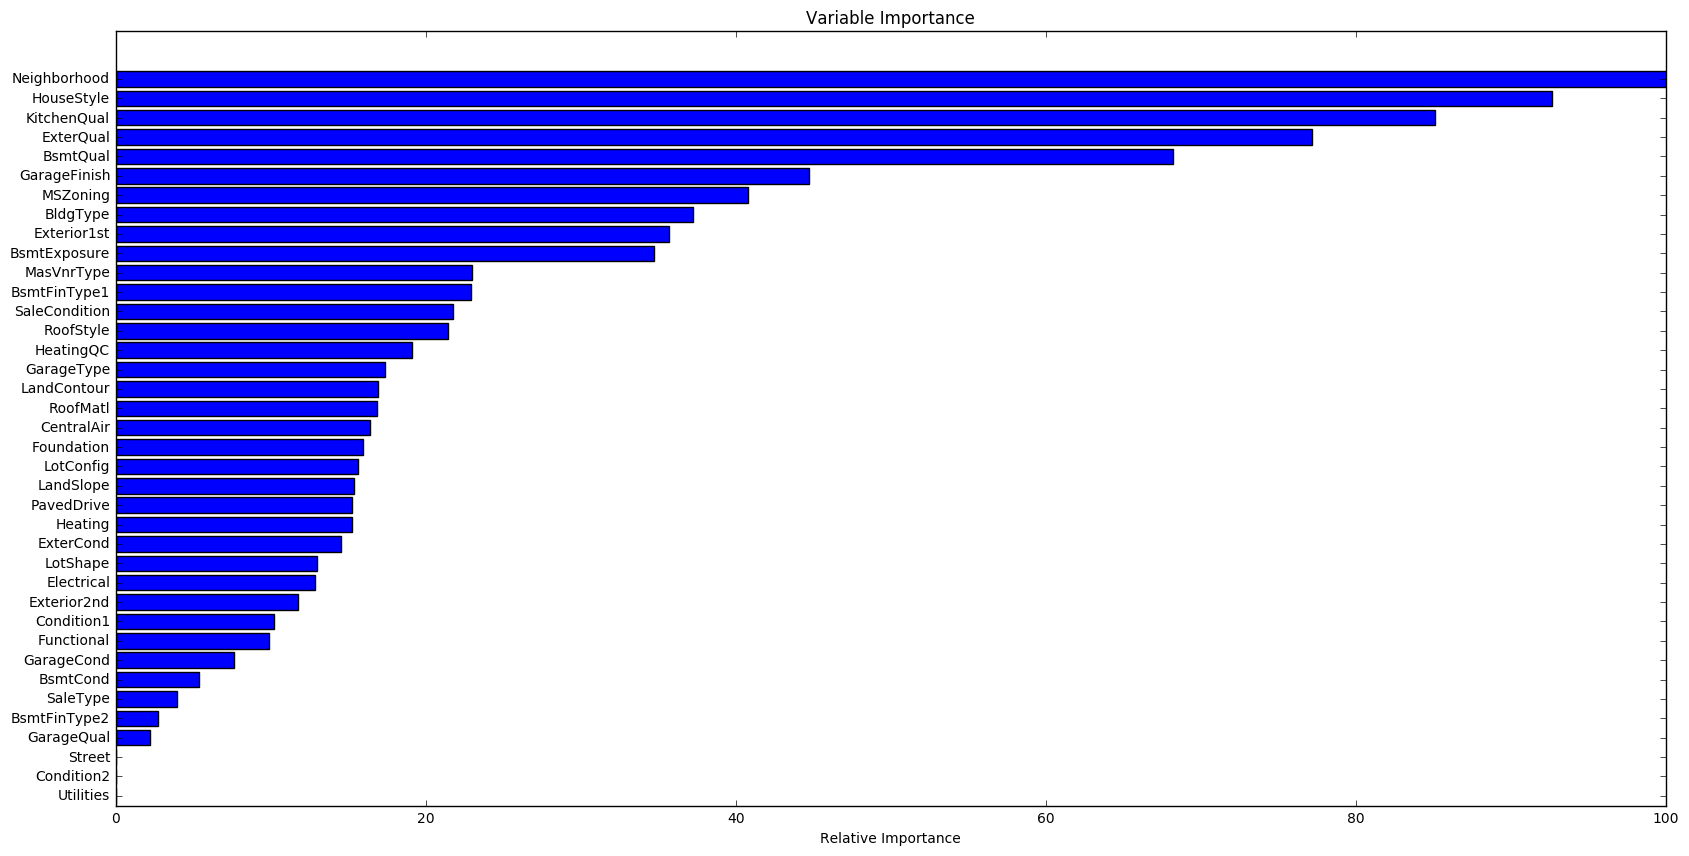

In [68]:
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(20,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, [input_features[i] for i in sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [69]:
# to have an idea of the score
from sklearn.model_selection import cross_val_score
# check model performance
scores = cross_val_score(clf, X, y, cv=3, scoring='neg_mean_squared_error')
# transform scores into the root mean square
scores = np.sqrt(-scores)
print("Mean Squared Error (on Log): %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Mean Squared Error (on Log): 0.20 (+/- 0.02)
